In [93]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
# 2. Membaca Dataset
dataset_path = 'ad_click_dataset.csv'  # Ganti dengan lokasi file dataset Anda
data = pd.read_csv(dataset_path)

In [95]:
# Menampilkan beberapa baris pertama
print("Data Awal:")
print(data.head())

Data Awal:
     id full_name   age      gender device_type ad_position browsing_history  \
0   670   User670  22.0         NaN     Desktop         Top         Shopping   
1  3044  User3044   NaN        Male     Desktop         Top              NaN   
2  5912  User5912  41.0  Non-Binary         NaN        Side        Education   
3  5418  User5418  34.0        Male         NaN         NaN    Entertainment   
4  9452  User9452  39.0  Non-Binary         NaN         NaN     Social Media   

  time_of_day  click  
0   Afternoon      1  
1         NaN      1  
2       Night      1  
3     Evening      1  
4     Morning      0  


In [96]:
# 3. Exploratory Data Analysis (EDA)
# Informasi dataset
print("\nInformasi Dataset:")
data.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [97]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
                 id          age         click
count  10000.000000  5234.000000  10000.000000
mean    5060.211400    40.197363      0.650000
std     2861.758265    13.126420      0.476993
min        5.000000    18.000000      0.000000
25%     2529.000000    29.000000      0.000000
50%     5218.000000    39.500000      1.000000
75%     7466.000000    52.000000      1.000000
max    10000.000000    64.000000      1.000000


In [98]:
# Memeriksa nilai kosong
print("\nNilai Kosong per Kolom:")
print(data.isnull().sum())



Nilai Kosong per Kolom:
id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


In [99]:
# Nilai unik di setiap kolom
print("\nNilai Unik per Kolom:")
print(data.nunique())


Nilai Unik per Kolom:
id                  4000
full_name           4000
age                   47
gender                 3
device_type            3
ad_position            3
browsing_history       5
time_of_day            4
click                  2
dtype: int64


In [100]:
# Distribusi untuk kolom kategorikal
categorical_columns = ['gender', 'device_type', 'ad_position', 'time_of_day']
for column in categorical_columns:
    print(f"\nDistribusi Kolom {column}:")
    print(data[column].value_counts())


Distribusi Kolom gender:
gender
Female        1834
Male          1810
Non-Binary    1663
Name: count, dtype: int64

Distribusi Kolom device_type:
device_type
Desktop    2754
Mobile     2649
Tablet     2597
Name: count, dtype: int64

Distribusi Kolom ad_position:
ad_position
Bottom    2817
Top       2597
Side      2586
Name: count, dtype: int64

Distribusi Kolom time_of_day:
time_of_day
Morning      2126
Afternoon    2016
Evening      1958
Night        1900
Name: count, dtype: int64


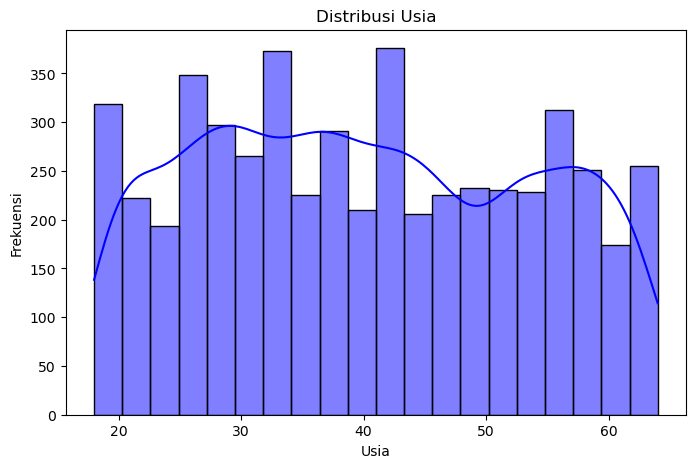

In [101]:
# 4. Visualisasi Data
# Distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=True, bins=20, color='blue')
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

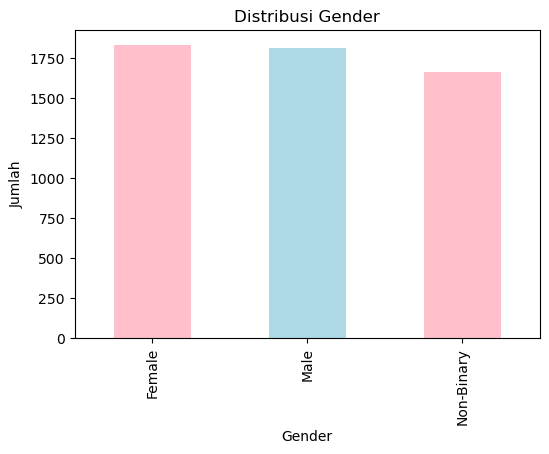

In [102]:
# Distribusi gender
plt.figure(figsize=(6, 4))
data['gender'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title("Distribusi Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.show()

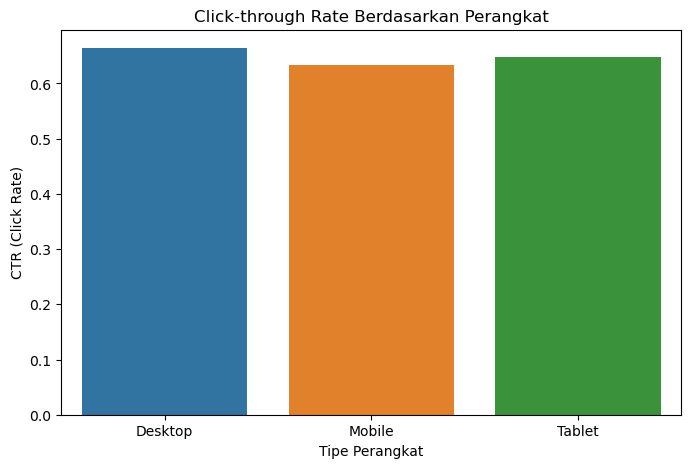

In [103]:
# Click-through rate (CTR) berdasarkan perangkat
plt.figure(figsize=(8, 5))
sns.barplot(x='device_type', y='click', data=data, estimator=np.mean, errorbar=None)
plt.title("Click-through Rate Berdasarkan Perangkat")
plt.xlabel("Tipe Perangkat")
plt.ylabel("CTR (Click Rate)")
plt.show()


In [105]:
# 5. Preprocessing Data
# Encoding data kategorikal
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['device_type'] = encoder.fit_transform(data['device_type'])
data['ad_position'] = encoder.fit_transform(data['ad_position'])
data['time_of_day'] = encoder.fit_transform(data['time_of_day'])


In [106]:
# 6. Membagi Dataset
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = data.drop('click', axis=1)  # Fitur
y = data['click']              # Target

# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data
print(f"Ukuran Data Latih: {X_train.shape}, Data Uji: {X_test.shape}")

Ukuran Data Latih: (8000, 8), Data Uji: (2000, 8)


In [107]:
# Identifikasi kolom kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kolom kategorikal yang perlu encoding:", categorical_columns)

# Encoding semua kolom kategorikal
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Periksa ulang apakah semua kolom sudah numerik
print("\nTipe data setelah encoding:")
print(data.dtypes)

# Split ulang data menjadi X dan y
X = data.drop('click', axis=1)
y = data['click']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pastikan tipe data numerik
print("\nTipe data dalam X_train:")
print(X_train.dtypes)


Kolom kategorikal yang perlu encoding: Index(['full_name', 'browsing_history'], dtype='object')

Tipe data setelah encoding:
id                    int64
full_name             int32
age                 float64
gender                int64
device_type           int64
ad_position           int64
browsing_history      int32
time_of_day           int64
click                 int64
dtype: object

Tipe data dalam X_train:
id                    int64
full_name             int32
age                 float64
gender                int64
device_type           int64
ad_position           int64
browsing_history      int32
time_of_day           int64
dtype: object


In [108]:
# Menghapus baris yang mengandung NaN
data = data.dropna()

# Pembagian data lagi setelah penghapusan
X = data.drop('click', axis=1)
y = data['click']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [109]:
from sklearn.impute import SimpleImputer

# Imputer untuk kolom numerik
imputer_num = SimpleImputer(strategy='mean')
X_train = imputer_num.fit_transform(X_train)
X_test = imputer_num.transform(X_test)

# Imputer untuk kolom kategorikal (jika ada kolom kategorikal)
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train = imputer_cat.fit_transform(X_train)
X_test = imputer_cat.transform(X_test)

In [110]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [111]:
from sklearn.metrics import accuracy_score

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")


Akurasi model: 0.86


In [112]:
from sklearn.metrics import classification_report

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       386
           1       0.84      0.97      0.90       661

    accuracy                           0.86      1047
   macro avg       0.88      0.83      0.84      1047
weighted avg       0.87      0.86      0.86      1047



In [113]:
from sklearn.metrics import confusion_matrix

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[266 120]
 [ 22 639]]


In [114]:
# Menampilkan feature importances
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.23510383 0.23277518 0.22046629 0.05678123 0.05873774 0.05406844
 0.06940648 0.07266081]


In [115]:
# nomer 8
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prediksi pada data uji
y_pred = model.predict(X_test)

# 2. Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

# 3. Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Menampilkan confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi model: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       386
           1       0.84      0.97      0.90       661

    accuracy                           0.86      1047
   macro avg       0.88      0.83      0.84      1047
weighted avg       0.87      0.86      0.86      1047

Confusion Matrix:
 [[266 120]
 [ 22 639]]


In [116]:
# nomer 9
import pickle

# Menyimpan model ke file .sav
filename = 'ad_prediction_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model berhasil disimpan ke file {filename}")


Model berhasil disimpan ke file ad_prediction_model.sav


In [117]:
# Memuat model dari file .sav
filename = 'ad_prediction_model.sav'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Menampilkan pesan bahwa model telah berhasil dimuat
print("Model berhasil dimuat.")

Model berhasil dimuat.


In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 10. Evaluasi Model
# Prediksi pada data uji
y_pred = model.predict(X_test)


In [119]:

# 10.1. Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

Akurasi model: 86.44%


In [120]:
# 10.2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[266 120]
 [ 22 639]]


In [121]:
# 10.3. Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       386
           1       0.84      0.97      0.90       661

    accuracy                           0.86      1047
   macro avg       0.88      0.83      0.84      1047
weighted avg       0.87      0.86      0.86      1047



In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 10. Evaluasi Model
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [123]:
# 10.1. Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

Akurasi model: 86.44%


In [124]:
# 10.2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

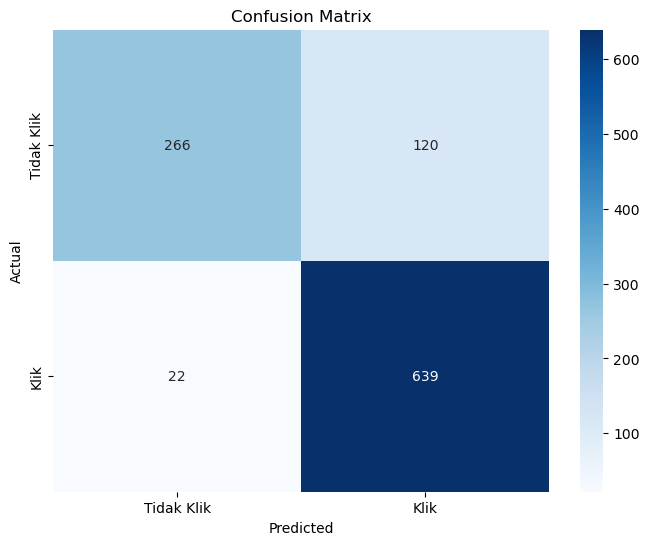

In [125]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Klik', 'Klik'], yticklabels=['Tidak Klik', 'Klik'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [126]:
# 10.3. Classification Report
class_report = classification_report(y_test, y_pred, output_dict=True)

In [127]:
# Visualisasi F1-Score per kelas
f1_scores = [class_report['0']['f1-score'], class_report['1']['f1-score']]
labels = ['Tidak Klik', 'Klik']

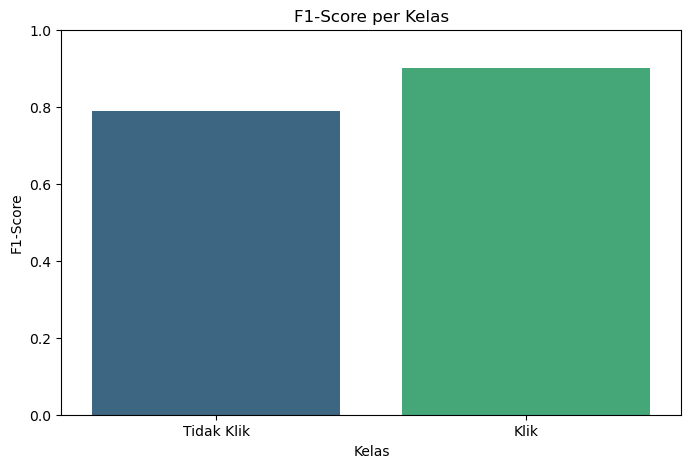

In [128]:
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=f1_scores, palette="viridis")
plt.title("F1-Score per Kelas")
plt.xlabel("Kelas")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()

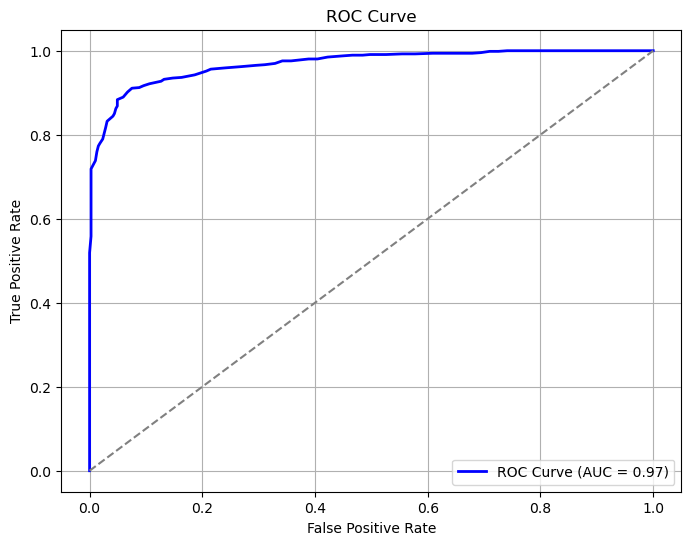

In [129]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# 1. ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 1 (Klik)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


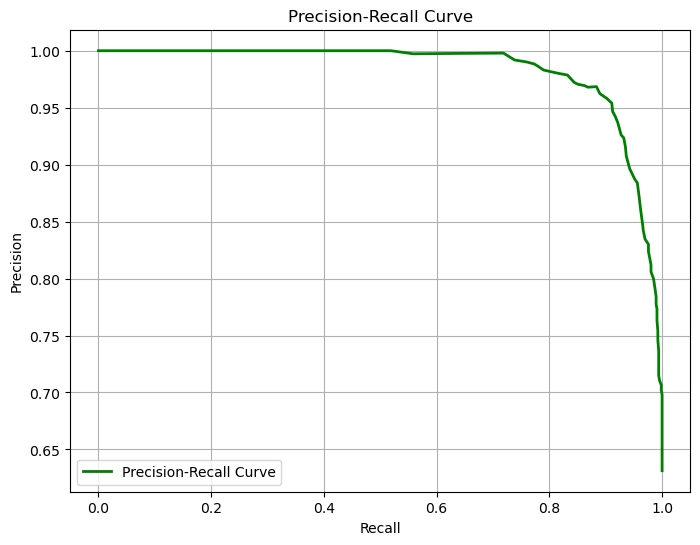

In [130]:
# 2. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid()
plt.show()

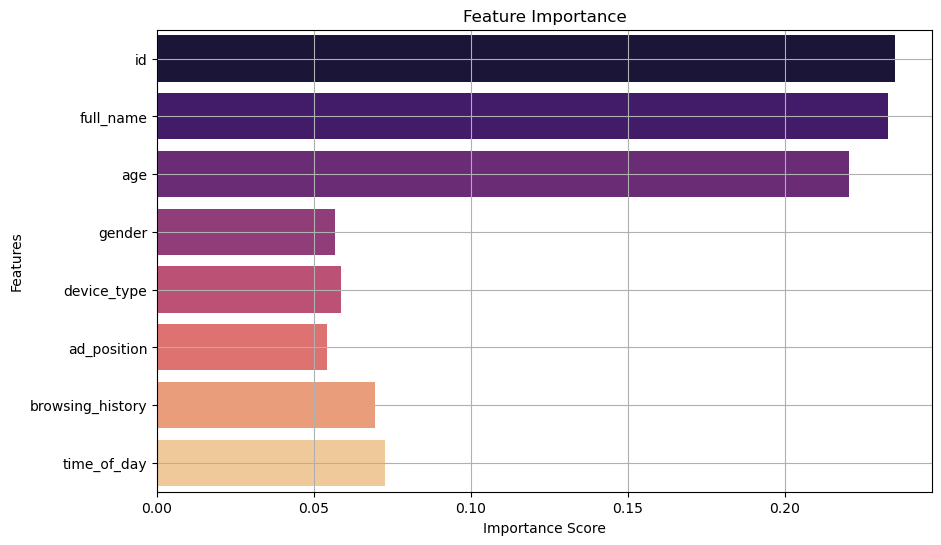

In [131]:
feature_names = X.columns

# 3. Feature Importance
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette="magma")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid()
plt.show()


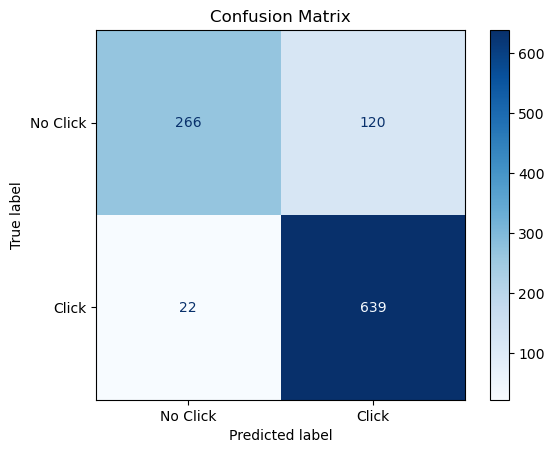

In [132]:
# 4. Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung dan tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Click", "Click"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


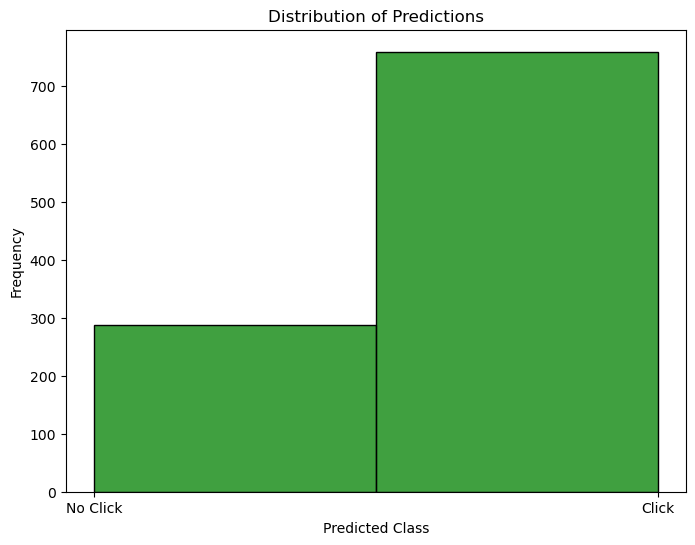

In [134]:
# 5. Distribution of Predictions
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=2, kde=False, color="green")
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["No Click", "Click"])
plt.show()